In [2]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.decision_tree import *
from Functions.Models.Logistic_regression import *
from Functions.Models.evaluation import *



In [3]:
creds = pd.read_csv('/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv')

## Connection to databse

In [4]:
#Connection to the database
alertP1=connection(creds)

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
1074


## Data cleaning

In [5]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'


## Creating new columns for features 

In [6]:
class_area(alertP1)
text_lenght(alertP1)
referral_steps(alertP1)
class_speciality(alertP1)
alertP1=unit(alertP1)



c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['unit'][alertP1['TIPO_UNID']!='CS/USF']='HOSP'


In [7]:
step_acceptance_rate(alertP1)

,step,number_of_acceptance,percentage
0,1,5168,66.0
1,2,936,74.0
2,3+,150,72.0


## structured data with dummies

In [30]:
data=structured_data_dummies(alertP1)
data

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,EPILEPSIA,NEUROLOGIA,NEUROLOGIA - CEFALEIAS,NEUROLOGIA - ESCLEROSE MULTIPLA,NEUROLOGIA DO COMPORTAMENTO,2,3+,HOSP,UCSP,USF
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,3,Normal,0,...,0,1,0,0,0,0,0,0,0,1
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,,unknown,0,...,0,1,0,0,0,0,0,0,0,1
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,,unknown,0,...,1,0,0,0,0,0,0,1,0,0
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,,unknown,0,...,0,1,0,0,0,0,0,0,0,1
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,,unknown,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,GSHADS,,LSHRSQTV,ZDCECBSE,9999999,UNIDADE ALERT-P,CS/USF,,unknown,7,...,0,1,0,0,0,0,0,0,0,0
10146,GSFFSC,,LSHTPHVS,ZEHGFBSH,3151104,MIGUEL BOMBARDA,CS/USF,,unknown,7,...,0,1,0,0,0,0,0,0,0,0
10147,GSCHDB,,LSHTVPOP,,0,,OUTRA,,unknown,1,...,0,1,0,0,0,0,0,1,0,0
10148,GSBZAA,,LSHUQOPP,ZEESAADG,3151101,ALHOS VEDROS,CS/USF,,unknown,7,...,0,1,0,0,0,0,0,0,0,0


## Logistic regression for all dataset

features and coefficients

In [20]:
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['text_length','ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df


,Feature,coefficients
0,outside area,-0.397390
1,SAM,0.256711
2,SON,-1.471326
3,unknown,-0.835323
4,DOENCAS DO MOVIMENTO,1.293239
5,DVC,0.004581
6,EPILEPSIA,0.689475
7,NEUROLOGIA,-3.128362
8,NEUROLOGIA - CEFALEIAS,0.031759
9,NEUROLOGIA - ESCLEROSE MULTIPLA,0.325554


metrics

Accuracy: 0.7381209503239741
Recall: 0.6140035199600202
Precision: 0.7209213279122093
              precision    recall  f1-score   support

     refused       0.70      0.28      0.40       578
    accepted       0.74      0.94      0.83      1274

    accuracy                           0.74      1852
   macro avg       0.72      0.61      0.62      1852
weighted avg       0.73      0.74      0.70      1852



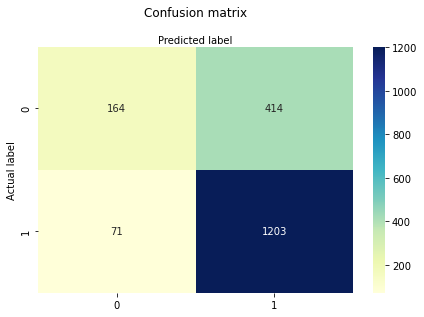

In [21]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

p value

In [12]:
p_value(X,y)

,Feature,p_value
0,outside area,0.000000e+00
1,SAM,4.163195e-15
2,SON,0.000000e+00
3,unknown,0.000000e+00
4,DOENCAS DO MOVIMENTO,3.335486e-29
5,DVC,1.153450e-06
6,EPILEPSIA,3.383452e-38
7,NEUROLOGIA,0.000000e+00
8,NEUROLOGIA - CEFALEIAS,3.268588e-01
9,NEUROLOGIA - ESCLEROSE MULTIPLA,1.843868e-06


## Logistic regression text variables

In [22]:
#logistic regression text rows
data=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df

c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,coefficients
0,text_length,0.001561
1,outside area,0.394249
2,SAM,-0.002917
3,SON,-0.126230
4,unknown,-0.815871
5,DOENCAS DO MOVIMENTO,1.265373
6,DVC,0.247124
7,EPILEPSIA,2.088300
8,NEUROLOGIA,-2.365057
9,NEUROLOGIA - CEFALEIAS,0.000000


metrics

Accuracy: 0.753125
Recall: 0.6776315789473684
Precision: 0.6957035558590262
              precision    recall  f1-score   support

     refused       0.58      0.50      0.54        92
    accepted       0.81      0.86      0.83       228

    accuracy                           0.75       320
   macro avg       0.70      0.68      0.68       320
weighted avg       0.74      0.75      0.75       320



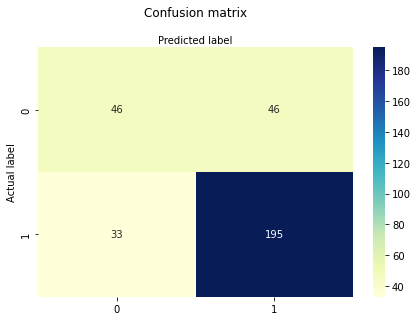

In [23]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))


In [24]:
p_value(X,y)

,Feature,p_value
0,text_length,2.568252e-30
1,outside area,4.194272e-27
2,SAM,1.991165e-04
3,SON,1.331836e-03
4,unknown,2.500977e-32
5,DOENCAS DO MOVIMENTO,1.173987e-06
6,DVC,4.246248e-02
7,EPILEPSIA,8.765856e-09
8,NEUROLOGIA,3.218134e-23
9,NEUROLOGIA - CEFALEIAS,5.001601e-01


Accuracy of the train set: 0.7419859265050821
Recall of the train set: 0.6025714400754665
Precision of the train set: 0.742075504995656
Accuracy: 0.725
Recall: 0.6221174004192872
Precision: 0.7218343383052999


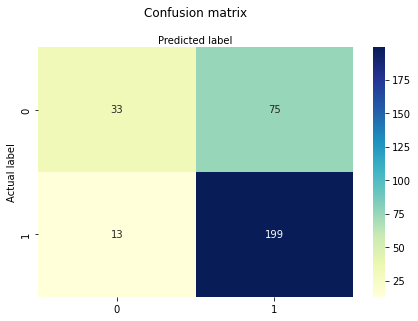

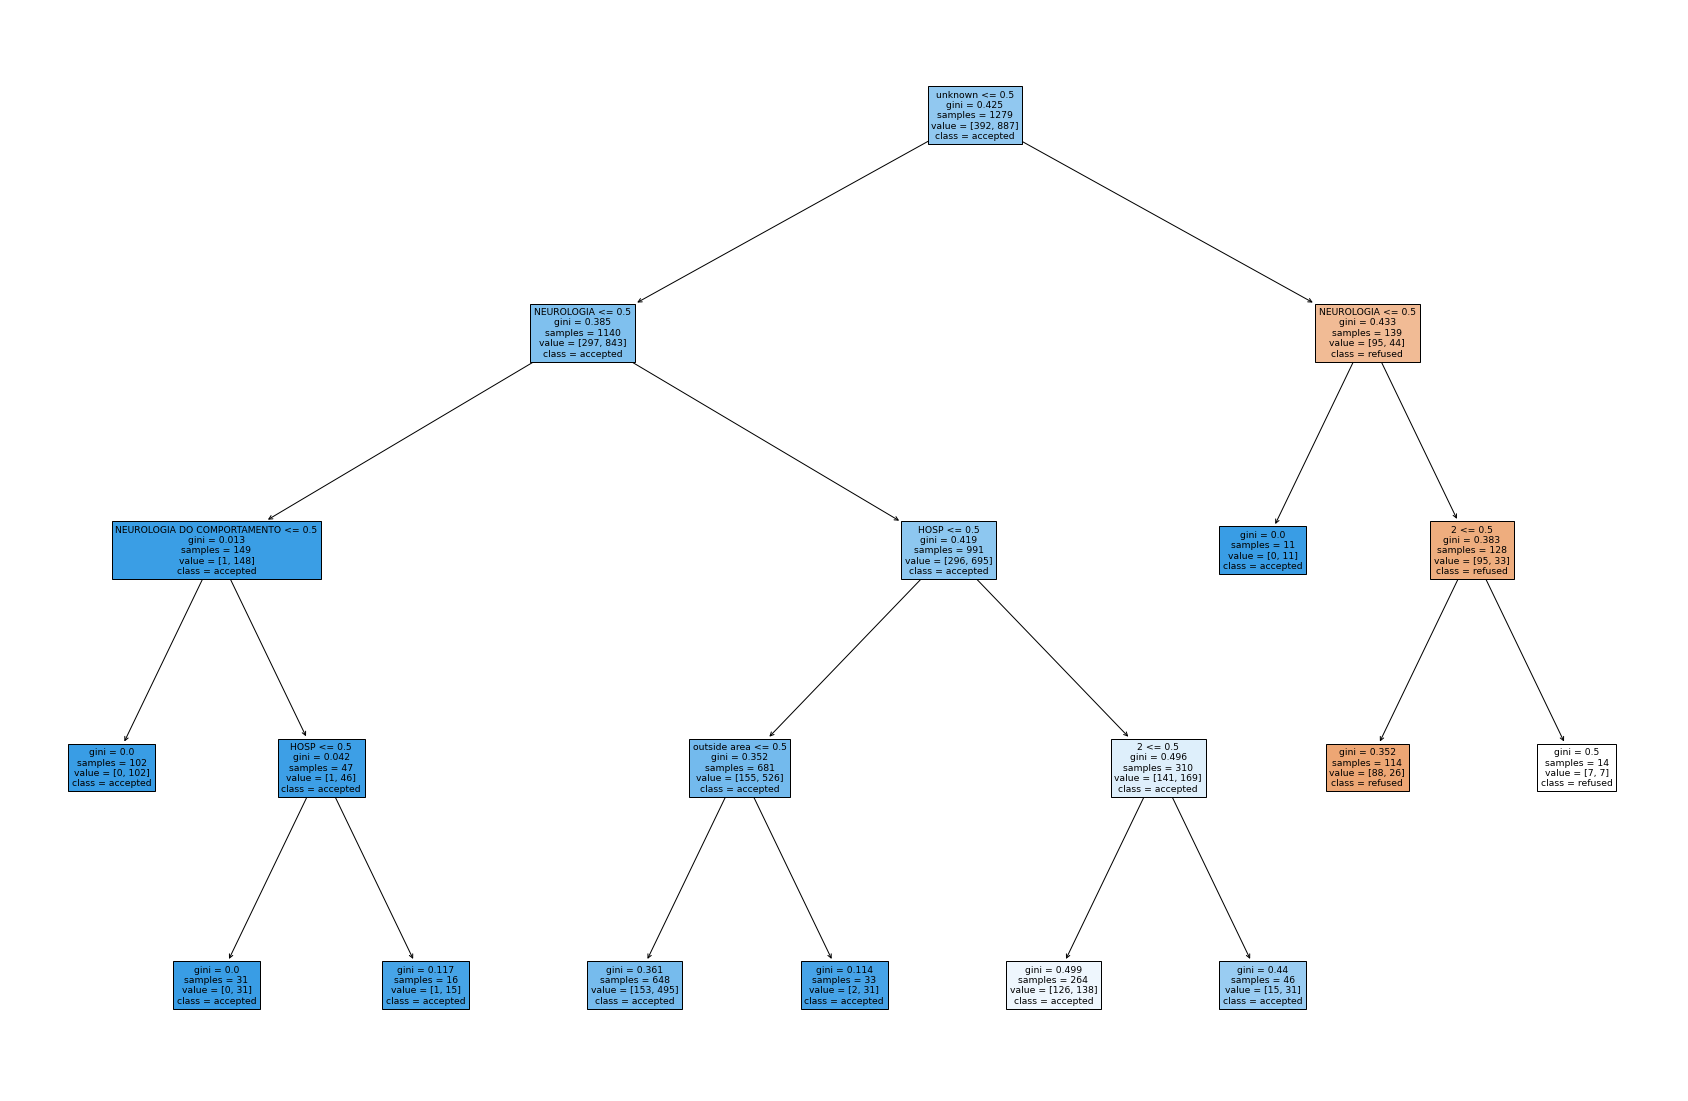

              precision    recall  f1-score   support

    accepted       0.72      0.31      0.43       108
     refused       0.73      0.94      0.82       212

    accuracy                           0.73       320
   macro avg       0.72      0.62      0.62       320
weighted avg       0.72      0.72      0.69       320



In [27]:
# Decision Tree classification model for whole dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

#split dataset in features and target variable
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto', 'text_length']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features = list(X.columns)
# feature_cols = ['text_length','outside area','SAM','SON','unknown','Other specialities']
# X = data[feature_cols] # Features
# y = data.result # Target variable

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the train set
accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Accuracy of the train set:", accuracy)

# Evaluate the recall of the train set
recall = recall_score(y_train,clf.predict(X_train), average='macro')
print("Recall of the train set:", recall)
# Evaluate the precision of the train set
precision = precision_score(y_train, clf.predict(X_train), average='macro')
print("Precision of the train set:", precision)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['refused', 'accepted'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['accepted', 'refused']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy of the train set: 0.7716966379984362
Recall of the train set: 0.6624298253687044
Precision of the train set: 0.7638666965678991
Accuracy: 0.753125
Recall: 0.6728686233403214
Precision: 0.7444567969859799


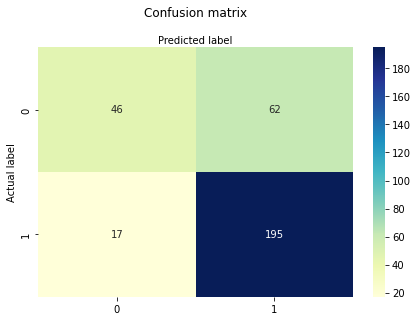

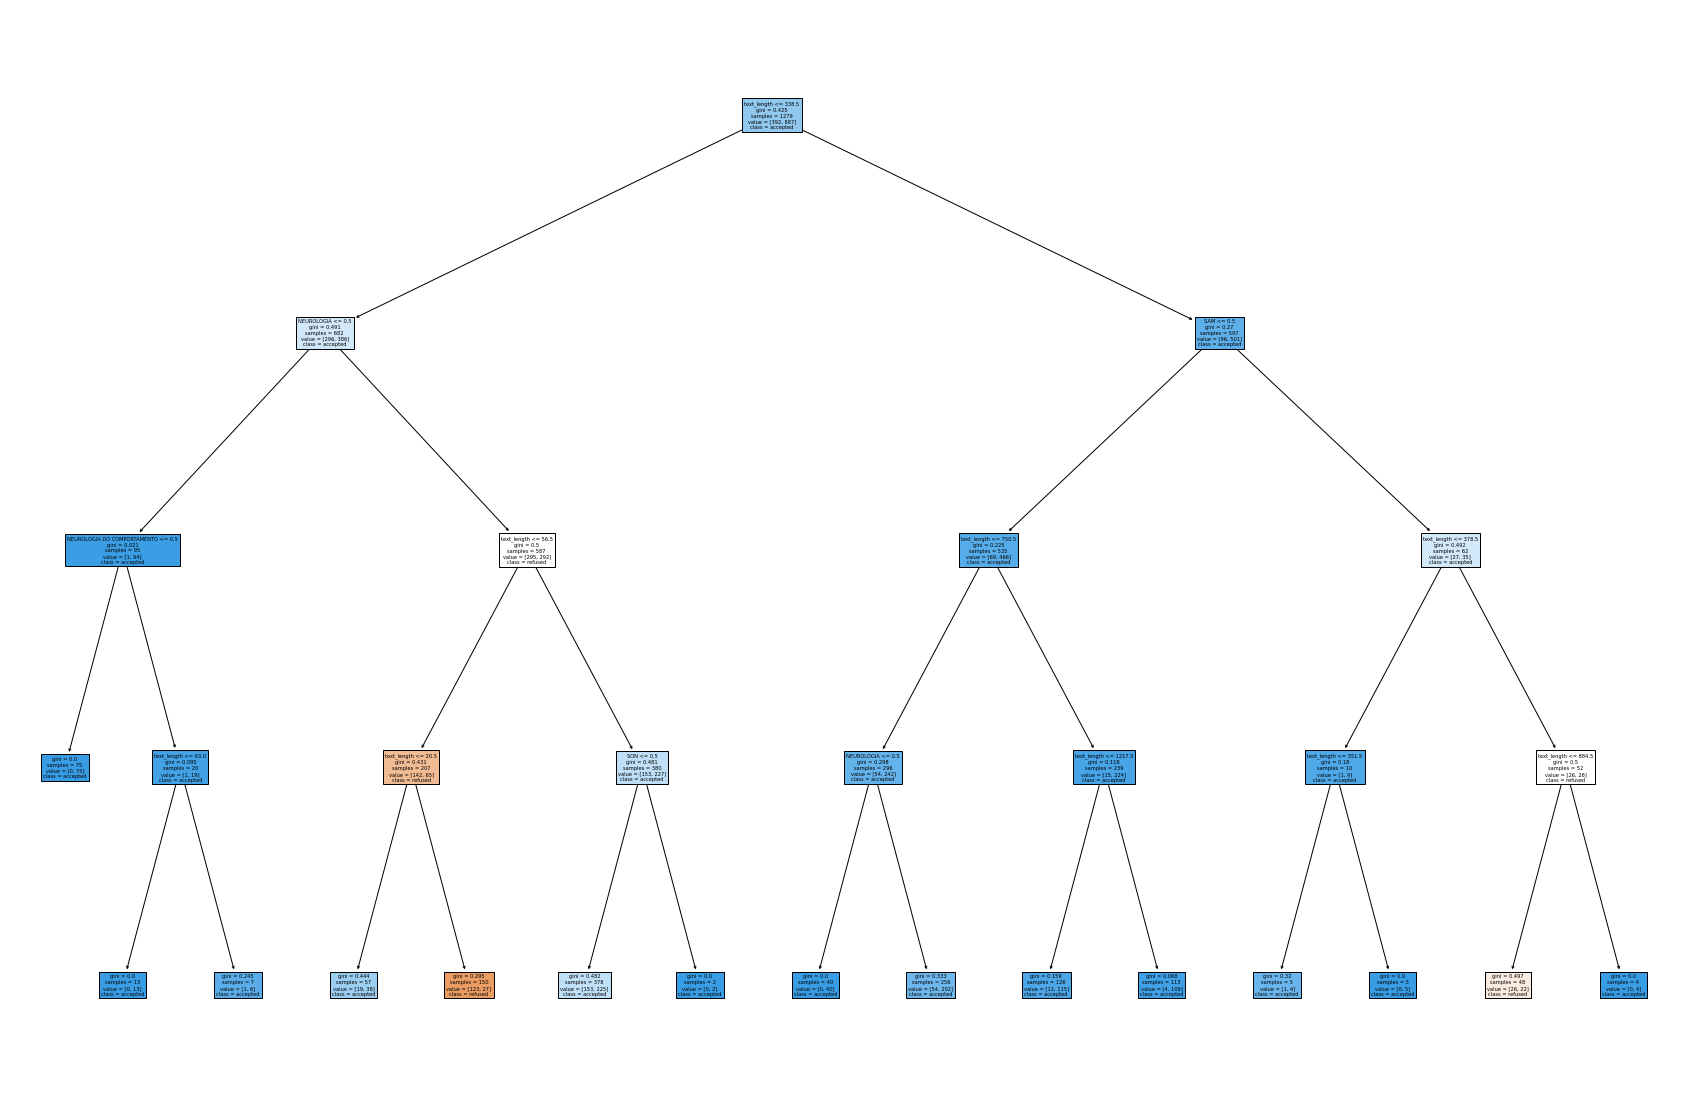

              precision    recall  f1-score   support

    accepted       0.73      0.43      0.54       108
     refused       0.76      0.92      0.83       212

    accuracy                           0.75       320
   macro avg       0.74      0.67      0.68       320
weighted avg       0.75      0.75      0.73       320



In [29]:
# Decision Tree classification model for text rows
data=data[data['text_length']>0]
#split dataset in features and target variable
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features = list(X.columns)
# feature_cols = ['text_length','outside area','SAM','SON','unknown','Other specialities']
# X = data[feature_cols] # Features
# y = data.result # Target variable

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the train set
accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Accuracy of the train set:", accuracy)

# Evaluate the recall of the train set
recall = recall_score(y_train,clf.predict(X_train), average='macro')
print("Recall of the train set:", recall)
# Evaluate the precision of the train set
precision = precision_score(y_train, clf.predict(X_train), average='macro')
print("Precision of the train set:", precision)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['refused', 'accepted'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['accepted', 'refused']
print(classification_report(y_test, y_pred, target_names=target_names))